# Laborator 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
from sklearn import preprocessing
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def read_data(file_path):
    data = []
    scores = []

    with open(file_path, mode='r',encoding="ISO-8859-1") as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            data.append(re.sub("[-.,;:!?\"\'\/()_*=`]", "", row["essay"].lower()).split())
            scores.append(int(row["score"]))
    return data, scores

In [4]:
dirPath = "C:\\Users\\corneliu.dumitru\\Desktop\\University\\Anul II\\IA\\Sem II\\Lab6\\"

train_data, train_scores = read_data(dirPath + "Data/train_data.csv")
test_data, test_scores = read_data(dirPath + "Data/test_data.csv")

print("Train data length: texts: %d, scores: %d" % (len(train_data), len(train_scores)))
print("Test data length: texts: %d, scores: %d" % (len(test_data), len(test_scores)))

Train data length: texts: 1426, scores: 1426
Test data length: texts: 357, scores: 357


[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


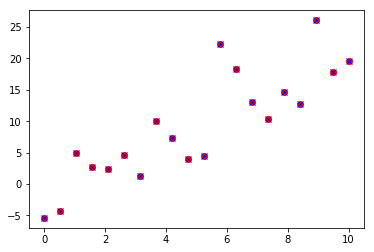

In [32]:
#toy example for KRR
x = np.linspace(0,10,20)
print(x)
y = 2*x + 5*np.random.randn(len(x))

modelKRR = KernelRidge(kernel = "rbf", alpha = 0)
modelKRR.fit(x.reshape(-1,1), y.reshape(-1,1))
y_predicted = modelKRR.predict(x.reshape(-1,1))
plt.plot(x,y,'or')
plt.plot(x,y_predicted,'xb')
plt.show()

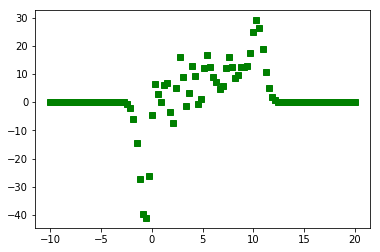

In [31]:
x_test = np.linspace(-10, 20, 100)
y_predicted = modelKRR.predict(x_test.reshape(-1, 1))
plt.plot(x_test, y_predicted, 'sg')
plt.show()

In [35]:
print(len(train_data[0]))

337


In [52]:
L = [['azi', 'e', 'luni'],
     ['maine', 'e', 'marti', 'grupa', '235'],
     ['grupa', '235']]

In [53]:
dictr = {}
nr_cuvinte = 0

for lista in L:
    for cuv in lista:
        if cuv not in dictr.keys():
            dictr[cuv] = len(dictr);
            nr_cuvinte += 1

print(dictr)

{'azi': 0, 'e': 1, 'luni': 2, 'maine': 3, 'marti': 4, 'grupa': 5, '235': 6}


In [54]:
features = np.zeros((len(L), len(dictr)))

for idx_lista, lista in enumerate(L):
    for cuv in lista:
        if cuv in dictr.keys():
            id = dictr[cuv]
            features[idx_lista, id] += 1

print(features)

[[1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]]


In [56]:
features_norm = preprocessing.normalize(features, norm='l2', axis=1)
print(features_norm)

[[0.57735027 0.57735027 0.57735027 0.         0.         0.
  0.        ]
 [0.         0.4472136  0.         0.4472136  0.4472136  0.4472136
  0.4472136 ]
 [0.         0.         0.         0.         0.         0.70710678
  0.70710678]]


In [63]:
class Bag_Of_Words:
    
    def __init__(self):
        self.dictionary = {}
        self.nr_words = 0
    
    def build_vocabulary(self, data):
        for essay in data:
            for word in essay:
                if word not in self.dictionary.keys():
                    self.dictionary[word] = self.nr_words;
                    self.nr_words += 1
    
    def get_features(self, data):
        features = np.zeros((len(data), self.nr_words))
        
        for idx_ess, essay in enumerate(data):
            for word in essay:
                if word in self.dictionary.keys():
                    id = self.dictionary[word]
                    features[idx_ess, id] += 1
        
        
        return features

In [69]:
D = Bag_Of_Words()
D.build_vocabulary(L)
print(D.get_features(L))
print(D.dictionary)

[[1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]]
{'azi': 0, 'e': 1, 'luni': 2, 'maine': 3, 'marti': 4, 'grupa': 5, '235': 6}


In [73]:
D = Bag_Of_Words()
D.build_vocabulary(train_data)
train_features = D.get_features(train_data)
train_features_norm = preprocessing.normalize(train_features, norm='l2', axis=1)

test_features = D.get_features(test_data)
test_features_norm = preprocessing.normalize(test_features, norm='l2', axis=1)


In [75]:
model = KernelRidge(kernel='rbf', alpha=pow(10, -4.25))
model.fit(train_features_norm, train_scores)

KernelRidge(alpha=5.623413251903491e-05, coef0=1, degree=3, gamma=None,
      kernel='rbf', kernel_params=None)

In [78]:
train_scores_predicted = model.predict(train_features_norm)
test_scores_predicted = model.predict(test_features_norm)

print(train_scores[:10])
print(train_scores_predicted[:10])

[8, 9, 7, 10, 8, 8, 10, 10, 9, 9]
[ 8.19302025  8.98339848  8.61025416  9.32138345  8.9756584   8.61286047
 10.34100318  9.64846814  9.38884617  8.99161024]


In [81]:
print("MSE train: ", mean_squared_error(train_scores, train_scores_predicted)) # 0.643
print("MSE test: ", mean_squared_error(test_scores, test_scores_predicted)) # 1.080 
print("MAE train: ", mean_absolute_error(train_scores, train_scores_predicted)) # 0.630
print("MAE test: ", mean_absolute_error(test_scores, test_scores_predicted)) # 0.832

MSE train:  0.6431273762648867
MSE test:  1.0807762723662209
MAE train:  0.630380498677186
MAE test:  0.8324633251553989
